Задание:


1) Исследуйте зависимость тестовой ошибки от количества деревьев в ансамбле для алгоритма forest Random  на наборе данных Organics. 
Постройте график зависимости тестовой ошибки при числе деревьев, равном 1, 11, 21, . . . , 301, объясните полученные результаты. 

2)Исследуйте зависимость тестовой ошибки от количества деревьев в ансамбле для алгоритма bagging на наборе данных Organics. Постройте график зависимости тестовой ошибки при числе деревьев, равном 1, 11, 21, . . . , 301, объясните полученные результаты. 

In [75]:
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rc, plot
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split

In [76]:
%matplotlib inline
df=pd.read_csv(r"C:\Users\W-book\Documents\Домашка\Анализ данных\№6\ORGANICS.csv",encoding="cp1251")

In [77]:
df['TargetBuy'].replace([0,1],['No','Buy'],inplace=True)
df

,ID,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy,TargetAmt
0,140,10.0,76.0,16.0,C,U,Midlands,Wales & West,Gold,16000.00,4.0,No,0
1,620,4.0,49.0,35.0,D,U,Midlands,Wales & West,Gold,6000.00,5.0,No,0
2,868,5.0,70.0,27.0,D,F,Midlands,Wales & West,Silver,0.02,8.0,Buy,1
3,1120,10.0,65.0,51.0,F,M,Midlands,Midlands,Tin,0.01,7.0,Buy,1
4,2313,11.0,68.0,4.0,A,F,Midlands,Midlands,Tin,0.01,8.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22218,52834058,13.0,65.0,9.0,B,F,South East,London,Silver,1500.00,5.0,No,0
22219,52834376,15.0,73.0,34.0,D,U,South East,S & S East,Gold,6053.06,12.0,No,0
22220,52837057,9.0,70.0,15.0,B,F,North,Yorkshire,Gold,6000.00,5.0,No,0
22221,52838096,11.0,66.0,8.0,B,F,North,N West,Silver,5000.00,5.0,No,0


In [78]:
df1= df.drop(df.columns[[0,12]], axis=1)

In [79]:
# for each column, get value counts in decreasing order and take the index (value) of most common class
df4 = df1.apply(lambda x: x.fillna(x.value_counts().index[0]))
print(df4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 11 columns):
DemAffl            22223 non-null float64
DemAge             22223 non-null float64
DemCluster         22223 non-null float64
DemClusterGroup    22223 non-null object
DemGender          22223 non-null object
DemReg             22223 non-null object
DemTVReg           22223 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           22223 non-null float64
TargetBuy          22223 non-null object
dtypes: float64(5), object(6)
memory usage: 1.9+ MB
None


In [80]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
df4['DemClusterGroup'] = le.fit_transform(df4['DemClusterGroup'])
df4['DemGender'] = le.fit_transform(df4['DemGender'])
df4['DemReg'] = le.fit_transform(df4['DemTVReg'])
df4['DemTVReg'] = le.fit_transform(df4['DemTVReg'])
df4['PromClass'] = le.fit_transform(df4['PromClass'])
df4['TargetBuy'] = le.fit_transform(df4['TargetBuy'])
#display the initial records
df4.head(20)

,DemAffl,DemAge,DemCluster,DemClusterGroup,DemGender,DemReg,DemTVReg,PromClass,PromSpend,PromTime,TargetBuy
0,10.0,76.0,16.0,2,2,11,11,0,16000.00,4.0,1
1,4.0,49.0,35.0,3,2,11,11,0,6000.00,5.0,1
2,5.0,70.0,27.0,3,0,11,11,2,0.02,8.0,0
3,10.0,65.0,51.0,5,1,4,4,3,0.01,7.0,0
4,11.0,68.0,4.0,0,0,4,4,3,0.01,8.0,1
5,9.0,72.0,28.0,3,2,7,7,1,20759.81,3.0,1
6,11.0,74.0,3.0,0,0,2,2,3,0.01,8.0,1
7,13.0,62.0,32.0,3,1,5,5,3,0.01,5.0,1
8,10.0,62.0,49.0,5,1,2,2,2,2038.76,3.0,1
9,14.0,43.0,49.0,5,0,3,3,0,6000.00,1.0,0


In [99]:
x=df4.values[:, 0:10]
y=df4.values[::,10]

# Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 10)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [100]:
from sklearn.ensemble  import  RandomForestClassifier 
count = []
number_score = []
n = 1
while n < 302 :
    count.append(n)
    clf = RandomForestClassifier(n_estimators=n,  max_features = 'sqrt',max_depth=6, min_samples_split=2, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    number_score.append(clf.score(X_test, y_test))
    n += 10

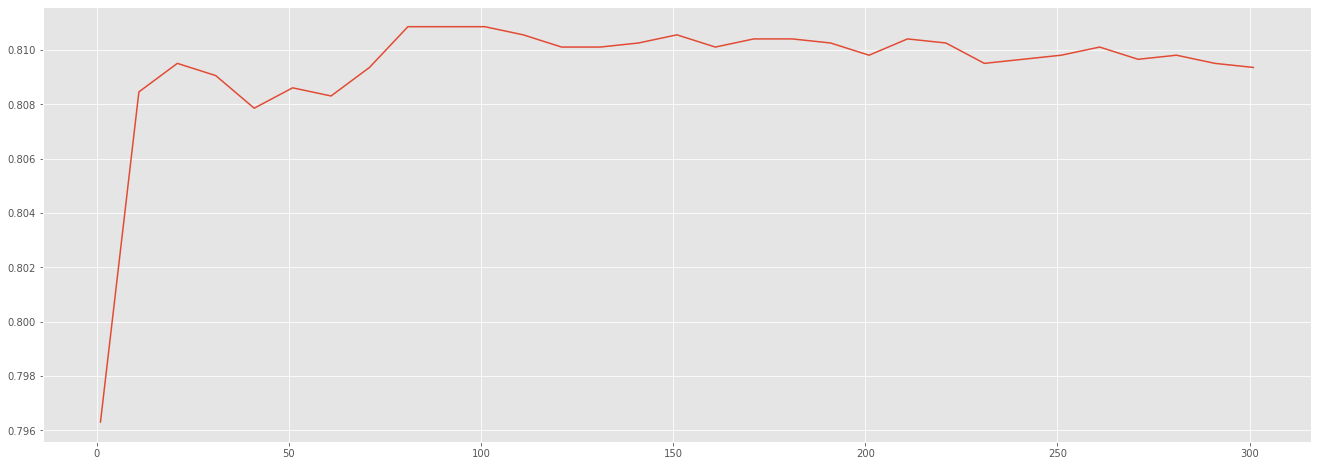

In [101]:
fig = plt.figure(figsize=(50, 8))
ax1 = fig.add_subplot(121)
ax1.plot(count, number_score)

### 2) 

In [84]:
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X, y, test_size=0.2)

In [91]:
tree_entropy=DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)
count1 = []
number_score1 = []
n = 1
while n < 302 :
    count1.append(n)
    bag_model=BaggingClassifier(base_estimator=tree_entropy, n_estimators=n, bootstrap=True)
    bag_model=bag_model.fit(X_train,y_train)
    y_pred_bag=bag_model.predict(X_test)
    number_score1.append(bag_model.score(X_test, y_test))
    n += 10

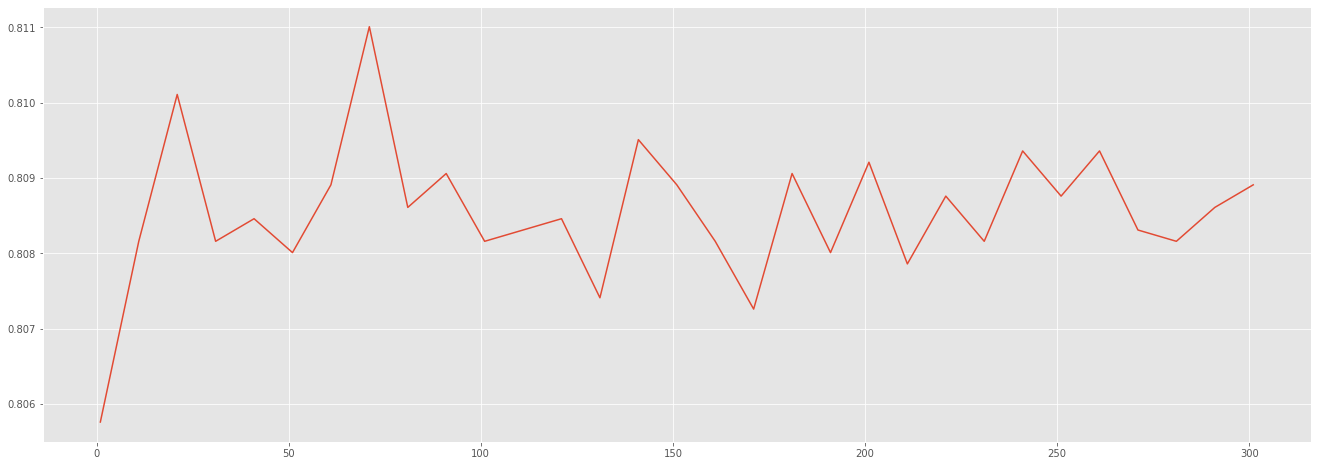

In [96]:
fig1 = plt.figure(figsize=(50, 8))
ax2 = fig1.add_subplot(121)
ax2.plot(count1, number_score1)